In [1]:
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import sys
from pathlib import Path
# in jupyter (lab / notebook), based on notebook path
module_path = str(Path.cwd().parents[0] / "src")

if module_path not in sys.path:
    sys.path.append(module_path)

import regression
import preprocessing

/Users/davidblumenthal/opt/miniconda3/envs/bda/lib/python3.9/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
a, b, c, dfs_c0, dfs_c1, dfs_c2 = preprocessing.import_preprocessed_data()

In [57]:
#
def calculate_empties_clust1(df, threshold):
    top_thresh = df.inter_pol.mean() + (df.inter_pol.std() * 0.75)
    empties_indices = []
    for idx,val in enumerate(df['inter_pol']):
        if idx != 0 and (df['inter_pol'][idx-1]*threshold < (df['inter_pol'][idx])) and (df['inter_pol'][idx] > top_thresh): 
            empties_indices.append(idx)
            
    # filter out double values
    for idx,val in enumerate(empties_indices): 
        if idx !=0 and (empties_indices[idx] - empties_indices[idx-1]) < 3: 
            empties_indices.pop(idx)
    return empties_indices

In [28]:
print(dfs_c1[0].inter_pol.describe())

count    365.000000
mean      95.473992
std       16.744332
min       52.000000
25%       83.875000
50%       98.538813
75%      107.291126
max      126.767045
Name: inter_pol, dtype: float64


In [60]:
def predictValues_clust1(input):
    counter = 1
    pred_list = list()
    temp_list = input['inter_pol'].tolist()

    emptie_checkpoints =  calculate_empties_clust1(input, 1.015)

    for k in range(emptie_checkpoints[0]):
        y = -3.62261628 * k + temp_list[0]
        pred_list.append(y)
    
    for timeinterval in emptie_checkpoints:
        if counter < len(emptie_checkpoints):
            length = emptie_checkpoints[counter] - timeinterval
            counter = counter + 1

            for i in range(length):
                y = -3.62261628 * i + temp_list[timeinterval]
                pred_list.append(y)
            
            addition = input.shape[0] - emptie_checkpoints[-1]
    
    for j in range(addition):
        y = -3.62261628 * temp_list[emptie_checkpoints[-1]]
        pred_list.append(y)
    
    print('values have been predicated')
    rmse = mean_squared_error(temp_list, pred_list, squared=False)
    print("Root Squared Mean Error:  " + str(rmse))
    return pred_list, rmse

In [ ]:
850 1.17

In [61]:
rmse_list = list()
for df in dfs_c1:
    predictions0, rmse = predictValues_clust1(df)
    rmse_list.append(rmse)
print(sum(rmse_list))

values have been predicated
Root Squared Mean Error:  204.4568229840372
values have been predicated
Root Squared Mean Error:  38.340078920245126
values have been predicated
Root Squared Mean Error:  53.87347819147782
values have been predicated
Root Squared Mean Error:  32.28604449491208
values have been predicated
Root Squared Mean Error:  136.22250931602238
values have been predicated
Root Squared Mean Error:  143.89926328873167
values have been predicated
Root Squared Mean Error:  147.07142430007295
756.1496214954993


In [50]:
def linearRegressionPlot_pred(input, cluster):
    if cluster < 0 or cluster > 4:
        print('Cluster has to be 0, 1, 2')
        return
    plt.figure(figsize=(30,8))
    plt.ylim((0,200))
    plt.title('Abweichung')

    plt.xticks(fontsize=8, rotation=90)
    plt.yticks(fontsize=10, fontweight='bold')
    plt.plot(input['inter_pol'])
    
    if cluster == 0:
        predicted = regression.predictValues_clust0(input)
        empties = preprocessing.calculate_empties_0(input, 1.01)
    elif cluster == 1:
        predicted, rmse = predictValues_clust1(input)
        empties = calculate_empties_clust1(input, 1.01)
    else:
        predicted = predictValues_clust2(input)
        empties = preprocessing.calculate_empties_2(input, 1.16)

    plt.plot(predicted)
    plt.legend(['Preprocessed', 'Predictions'], loc='upper left')

    for i in empties: 
        plt.vlines(i, color="green", ymin=0, ymax=200)
    plt.show()
    print(rmse)

values have been predicated
Root Squared Mean Error:  204.4568229840372


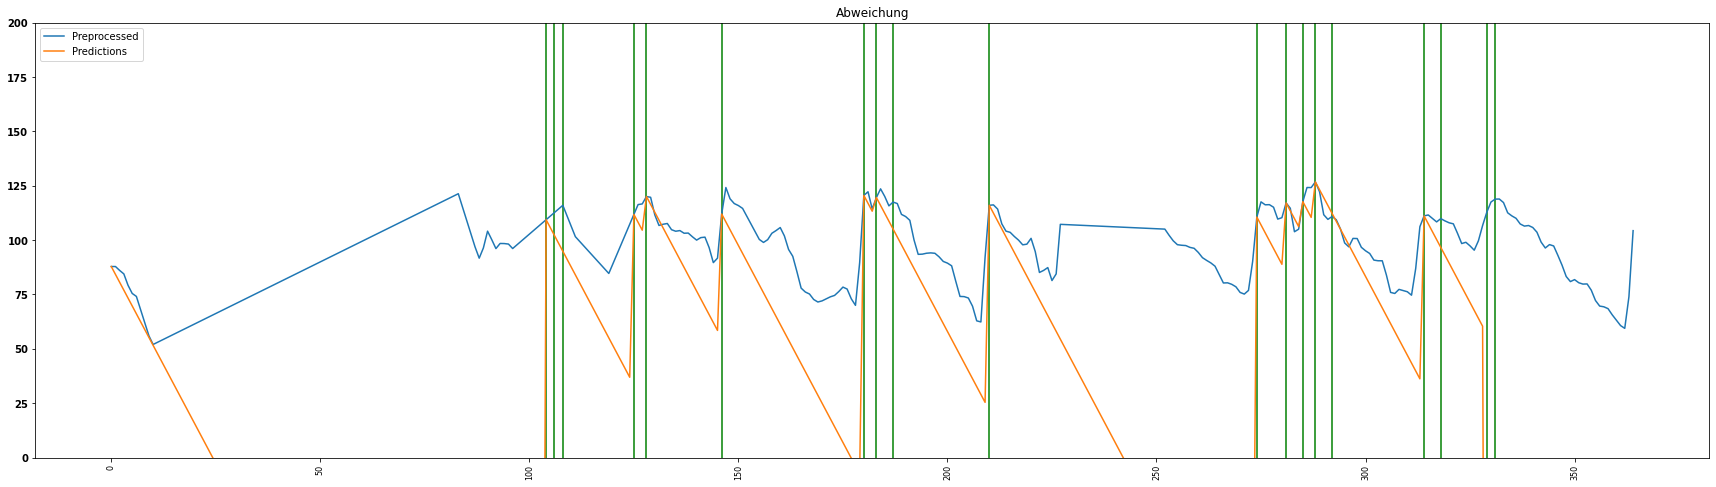

204.4568229840372
values have been predicated
Root Squared Mean Error:  38.340078920245126


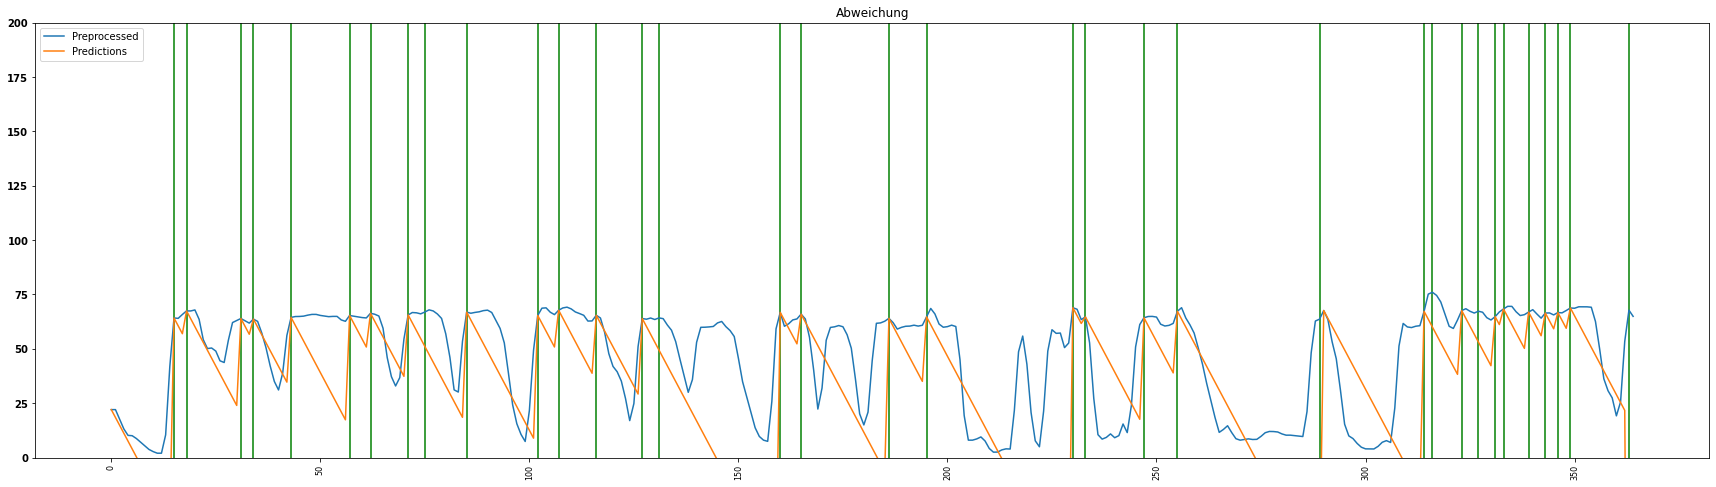

38.340078920245126
values have been predicated
Root Squared Mean Error:  53.87347819147782


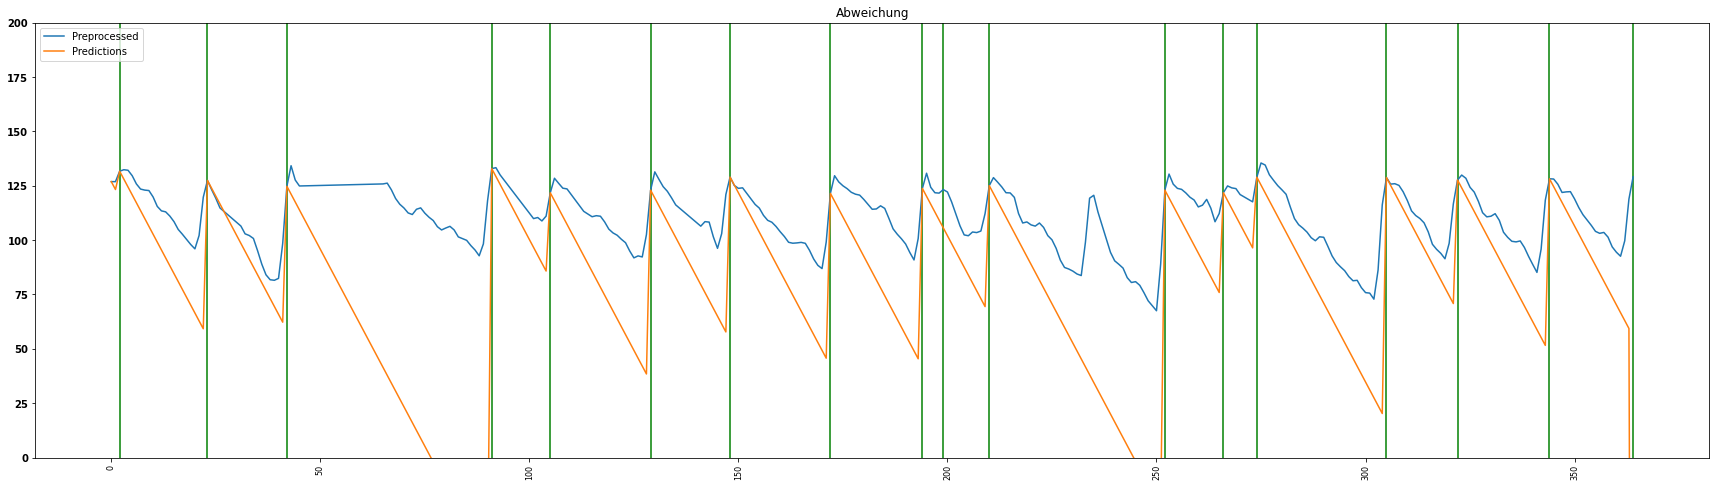

53.87347819147782
values have been predicated
Root Squared Mean Error:  32.28604449491208


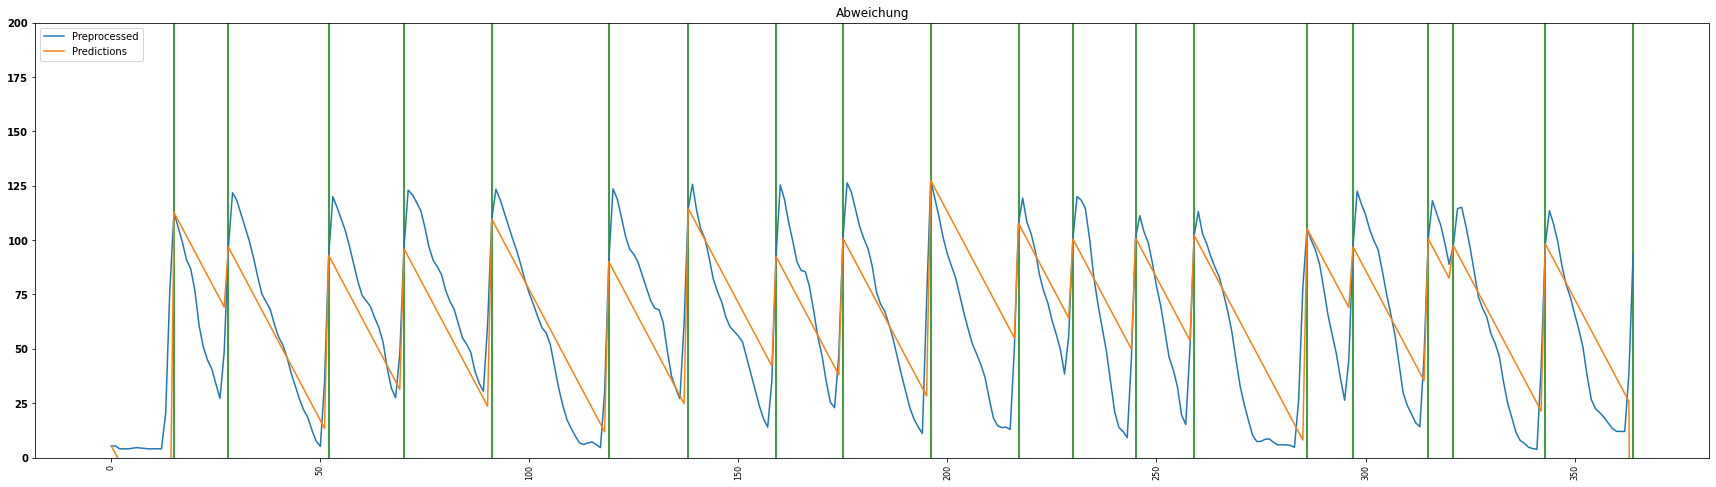

32.28604449491208
values have been predicated
Root Squared Mean Error:  136.22250931602238


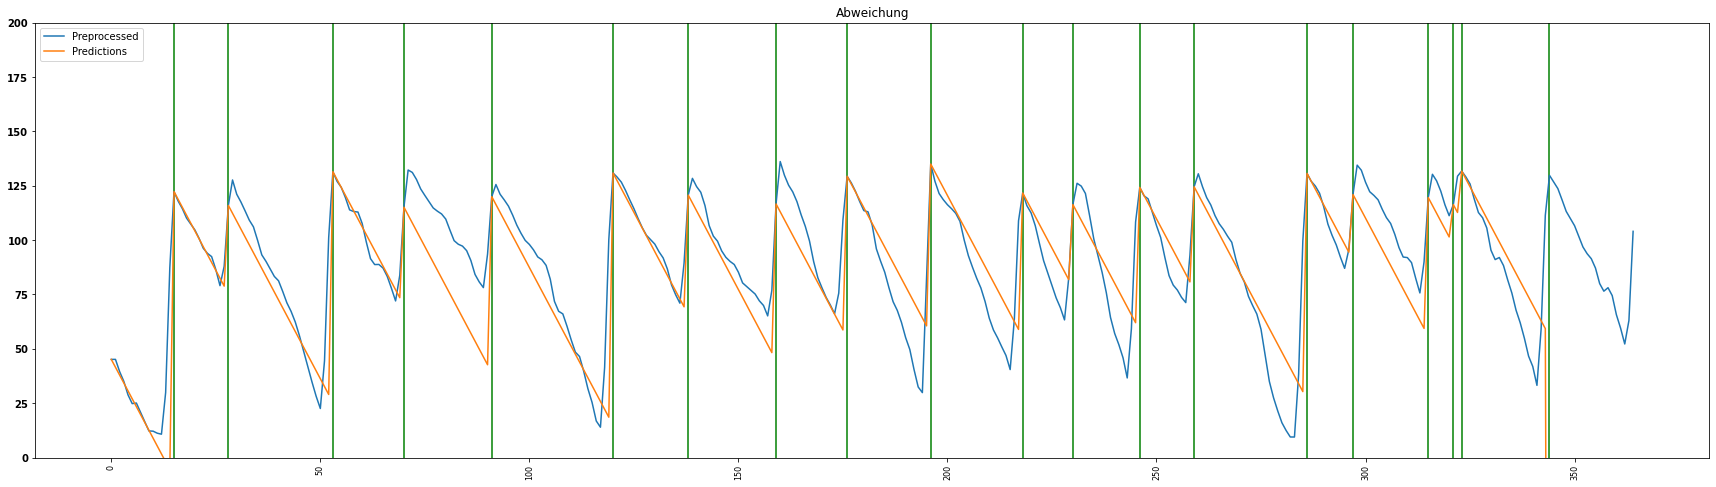

136.22250931602238
values have been predicated
Root Squared Mean Error:  143.89926328873167


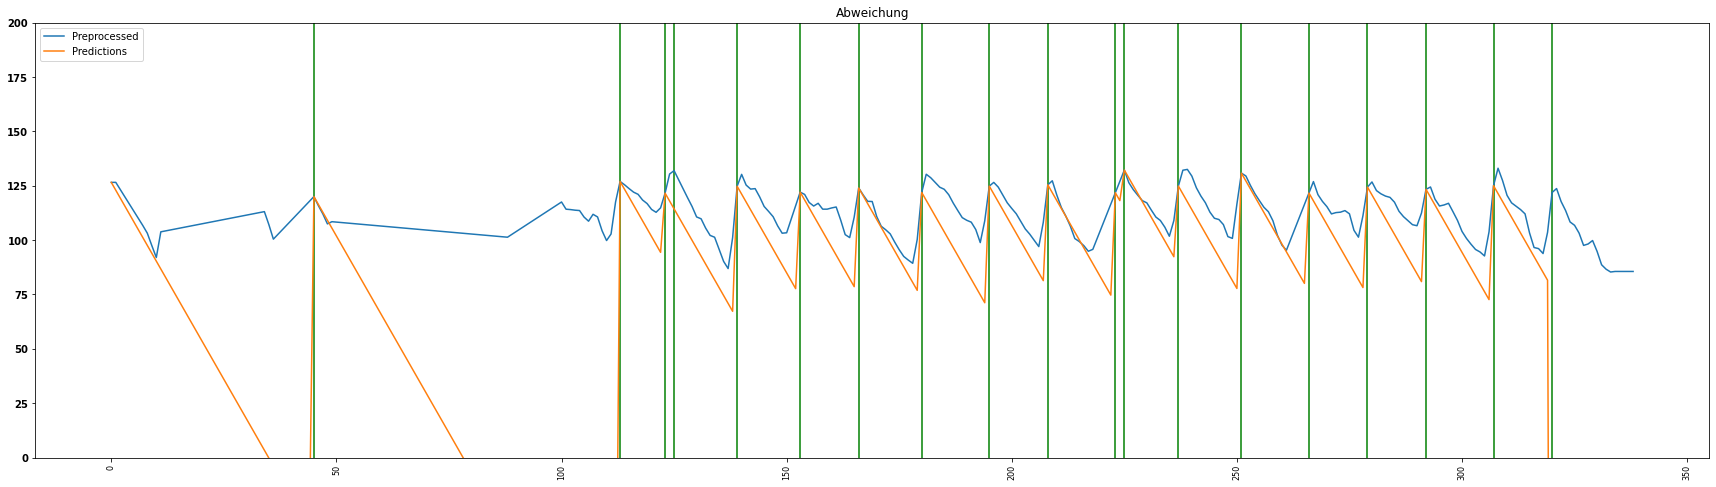

143.89926328873167
values have been predicated
Root Squared Mean Error:  147.07142430007295


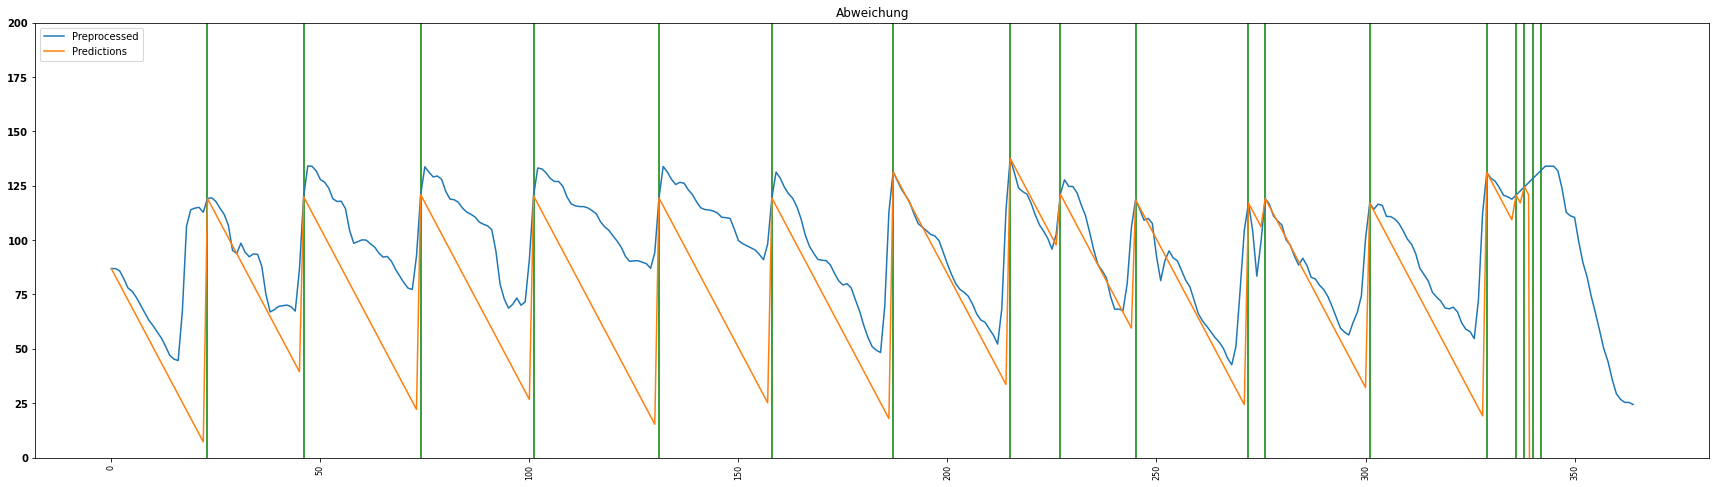

147.07142430007295


In [62]:
for df in dfs_c1:
    linearRegressionPlot_pred(df, 1)

In [32]:
for df in dfs_c1:

    empt = calculate_empties_clust1(df, 1.02)
    plt.figure(figsize=[200, 100])
    plt.plot(df['inter_pol'])
    #plt.plot(dfs_c1[0]['Height'])

    for i in empt: 
        plt.vlines(i, color="red", ymin=0, ymax=200)
    plt.show()
    #plt.plot(liset)

21


Cluster 0

In [173]:
def predictValues_clust0(input):
    counter = 1
    pred_list = list()
    temp_list = input['inter_pol'].tolist()

    emptie_checkpoints =  calculate_empties_0(input, 1.10)

    for k in range(emptie_checkpoints[0]):
        y = -3.62261628 * k + temp_list[0]
        pred_list.append(y)
    
    for timeinterval in emptie_checkpoints:
        if counter < len(emptie_checkpoints):
            length = emptie_checkpoints[counter] - timeinterval
            counter = counter + 1

            for i in range(length):
                y = -3.62261628 * i + temp_list[timeinterval]
                pred_list.append(y)
            
            addition = input.shape[0] - emptie_checkpoints[-1]
    
    for j in range(addition):
        y = -3.62261628 * temp_list[emptie_checkpoints[-1]]
        pred_list.append(y)
    
    print('values have been predicated')
    rmse = mean_squared_error(temp_list, pred_list, squared=False)
    print(rmse)
    return pred_list, rmse

In [135]:
def calculate_empties_0(df, threshold):
    empties_indices = []
    for idx,val in enumerate(df['inter_pol']):
        if idx != 0 and (df['inter_pol'][idx-1]*threshold < (df['inter_pol'][idx])) and (df['inter_pol'][idx] > 120): 
            empties_indices.append(idx)
            
    # filter out double values
    for idx,val in enumerate(empties_indices): 
        if idx !=0 and (empties_indices[idx] - empties_indices[idx-1]) < 3: 
            empties_indices.pop(idx)
    return empties_indices

In [174]:
#703
rmse_list = list()
for df in dfs_c0:
    predictions0, rmse = predictValues_clust0(df)
    rmse_list.append(rmse)
print(sum(rmse_list))

values have been predicated
52.92448490213367
values have been predicated
60.63043597389915
values have been predicated
89.54304230779927
values have been predicated
57.28311363843261
values have been predicated
34.18121621154891
values have been predicated
36.88881894506877
values have been predicated
60.703265165709176
values have been predicated
48.987174068591436
values have been predicated
60.734102516529845
values have been predicated
52.86141390071387
values have been predicated
52.67037112857115
values have been predicated
44.772914747266576
values have been predicated
192.47100312283044
844.6513566290948


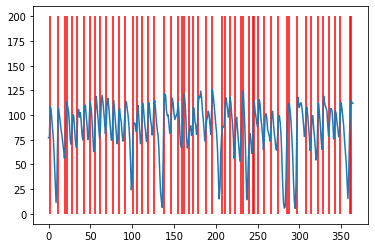

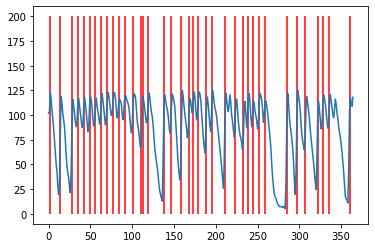

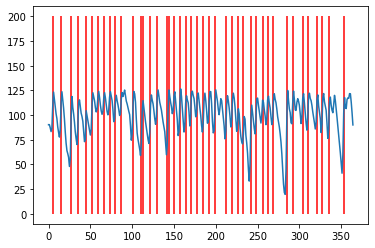

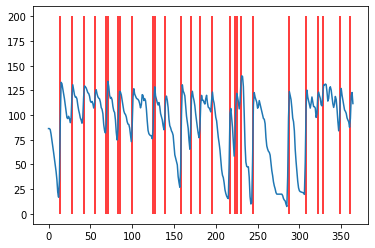

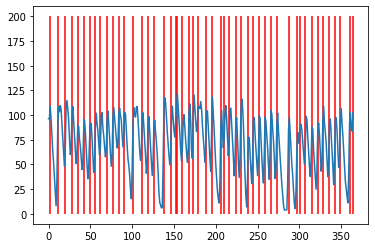

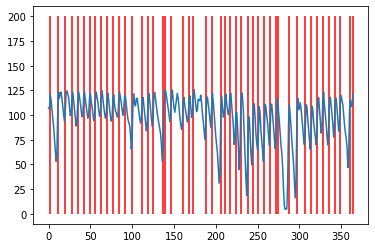

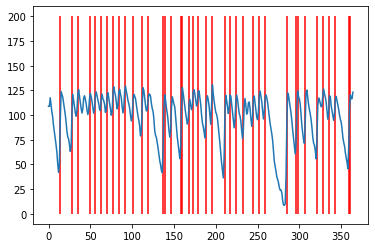

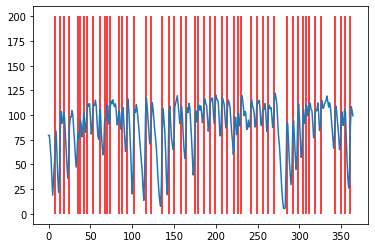

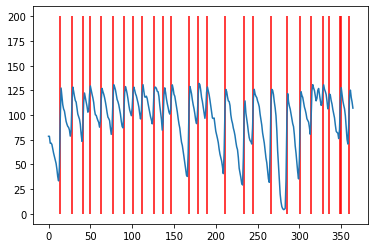

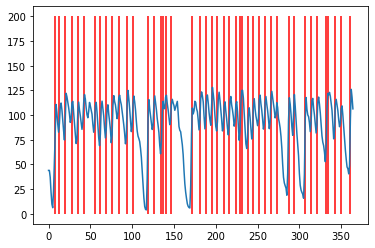

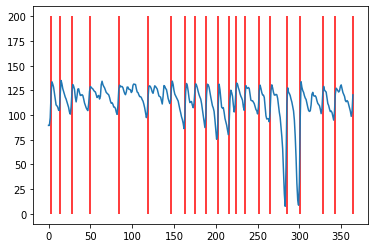

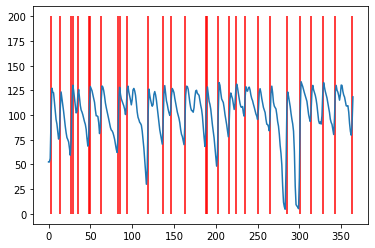

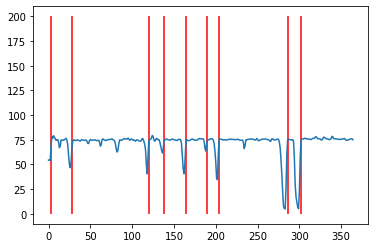

In [172]:
for df in dfs_c0:

    empt = calculate_empties_0(df, 1.10)
    plt.plot(df['inter_pol'])
    #plt.plot(dfs_c1[0]['Height'])

    for i in empt: 
        plt.vlines(i, color="red", ymin=0, ymax=200)
    plt.show()
    #plt.plot(liset)

Cluster 2 Stuff

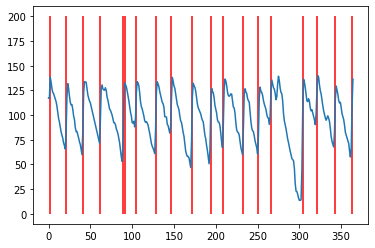

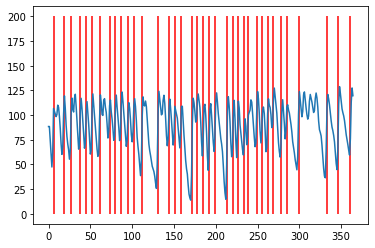

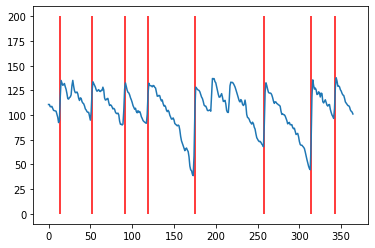

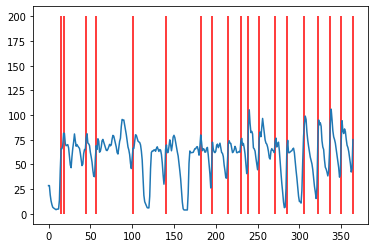

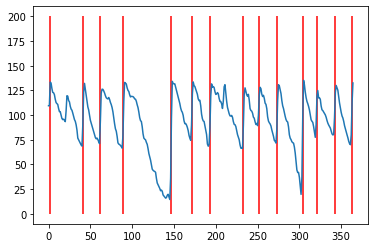

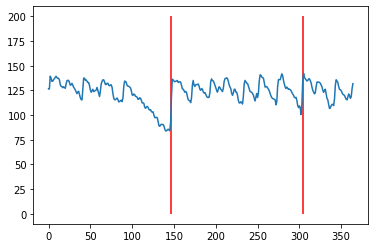

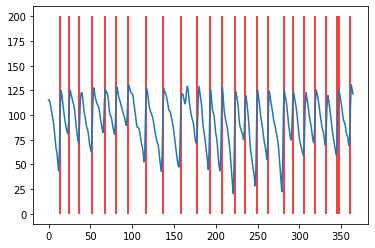

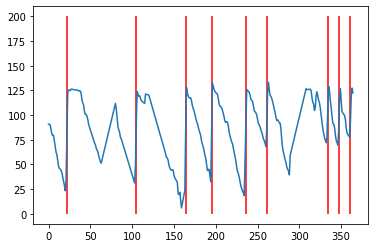

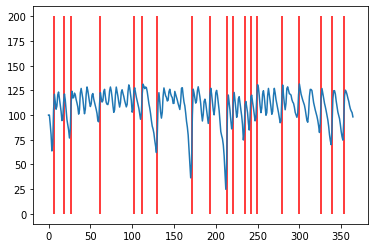

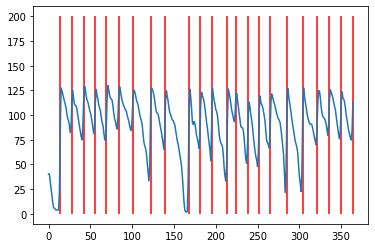

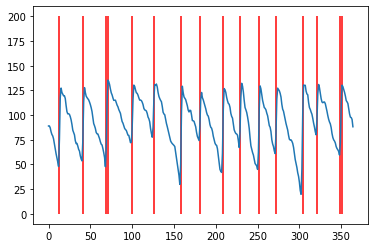

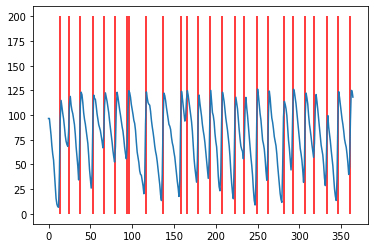

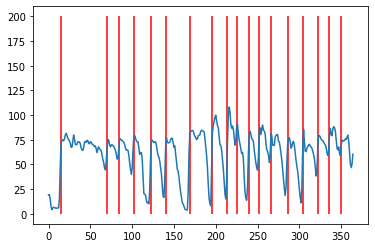

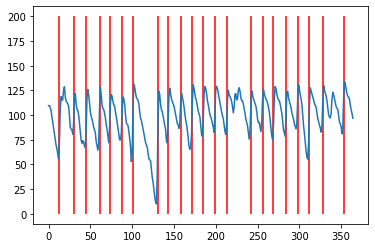

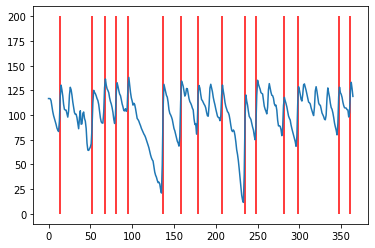

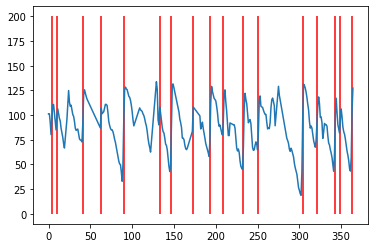

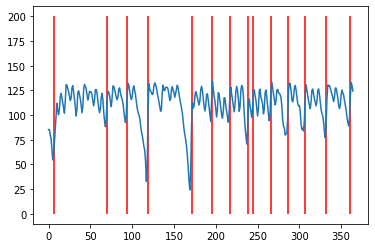

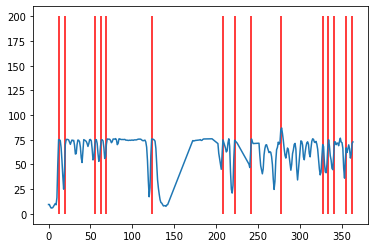

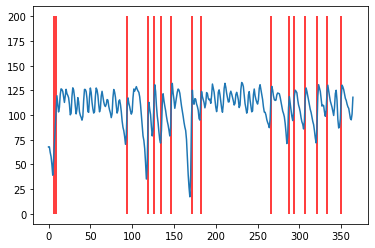

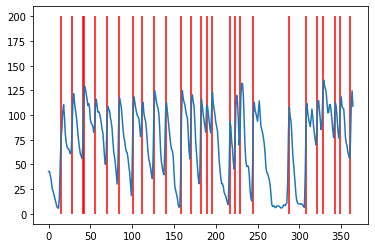

In [83]:
for df in dfs_c2:

    empt = calculate_empties_2(df, 1.17)
    plt.plot(df['inter_pol'])
    #plt.plot(dfs_c1[0]['Height'])

    for i in empt: 
        plt.vlines(i, color="red", ymin=0, ymax=200)
    plt.show()
    #plt.plot(liset)

In [89]:
def predictValues_clust2(input):
    counter = 1
    pred_list = list()
    temp_list = input['inter_pol'].tolist()

    emptie_checkpoints =  calculate_empties_2(input, 1.16)

    for k in range(emptie_checkpoints[0]):
        y = -3.62261628 * k + temp_list[0]
        pred_list.append(y)
    
    for timeinterval in emptie_checkpoints:
        if counter < len(emptie_checkpoints):
            length = emptie_checkpoints[counter] - timeinterval
            counter = counter + 1

            for i in range(length):
                y = -3.62261628 * i + temp_list[timeinterval]
                pred_list.append(y)
            
            addition = input.shape[0] - emptie_checkpoints[-1]
    
    for j in range(addition):
        y = -3.62261628 * temp_list[emptie_checkpoints[-1]]
        pred_list.append(y)
    
    print('values have been predicated')
    rmse = mean_squared_error(temp_list, pred_list, squared=False)
    print(rmse)
    return pred_list

In [80]:
def calculate_empties_2(df, threshold):
    empties_indices = []
    for idx,val in enumerate(df['inter_pol']):
        if idx != 0 and (df['inter_pol'][idx-1]*threshold < (df['inter_pol'][idx])) and (df['inter_pol'][idx] > 65): 
            empties_indices.append(idx)
            
    # filter out double values
    for idx,val in enumerate(empties_indices): 
        if idx !=0 and (empties_indices[idx] - empties_indices[idx-1]) < 3: 
            empties_indices.pop(idx)
    return empties_indices

In [84]:
for df in dfs_c2:
    predictions0 = predictValues_clust2(df)

values have been predicated
52.93582563224245
values have been predicated
44.12717191426832
values have been predicated
165.64744986994958
values have been predicated
46.68435547688457
values have been predicated
65.40303777397696
values have been predicated
380.8313706758433
values have been predicated
58.85310759579823
values have been predicated
126.1354223800169
values have been predicated
91.15711318456438
values have been predicated
40.09581741417556
values have been predicated
123.01880468642517
values have been predicated
52.59709906347013
values have been predicated
80.65334439323681
values have been predicated
103.45205047765972
values have been predicated
65.80297141937734
values have been predicated
53.59723730260608
values have been predicated
75.12109965046336
values have been predicated
97.58440670016796
values have been predicated
68.4474539487472
values have been predicated
43.492583554757836


In [90]:
for df in dfs_c2:
    predictions0 = predictValues_clust2(df)

values have been predicated
52.93582563224245
values have been predicated
44.88527405171988
values have been predicated
165.25610516006742
values have been predicated
53.918894363934555
values have been predicated
65.40303777397696
values have been predicated
380.8313706758433
values have been predicated
59.111503821880056
values have been predicated
126.1354223800169
values have been predicated
96.84245724838209
values have been predicated
39.153960561296834
values have been predicated
123.01880468642517
values have been predicated
53.299443031263145
values have been predicated
80.65334439323681
values have been predicated
103.88394206118916
values have been predicated
71.37956667025287
values have been predicated
66.03584434649554
values have been predicated
100.86952980301454
values have been predicated
102.11590499929846
values have been predicated
94.01846338237821
values have been predicated
43.492583554757836


values have been predicated
Root Squared Mean Error:  371.22695801072314


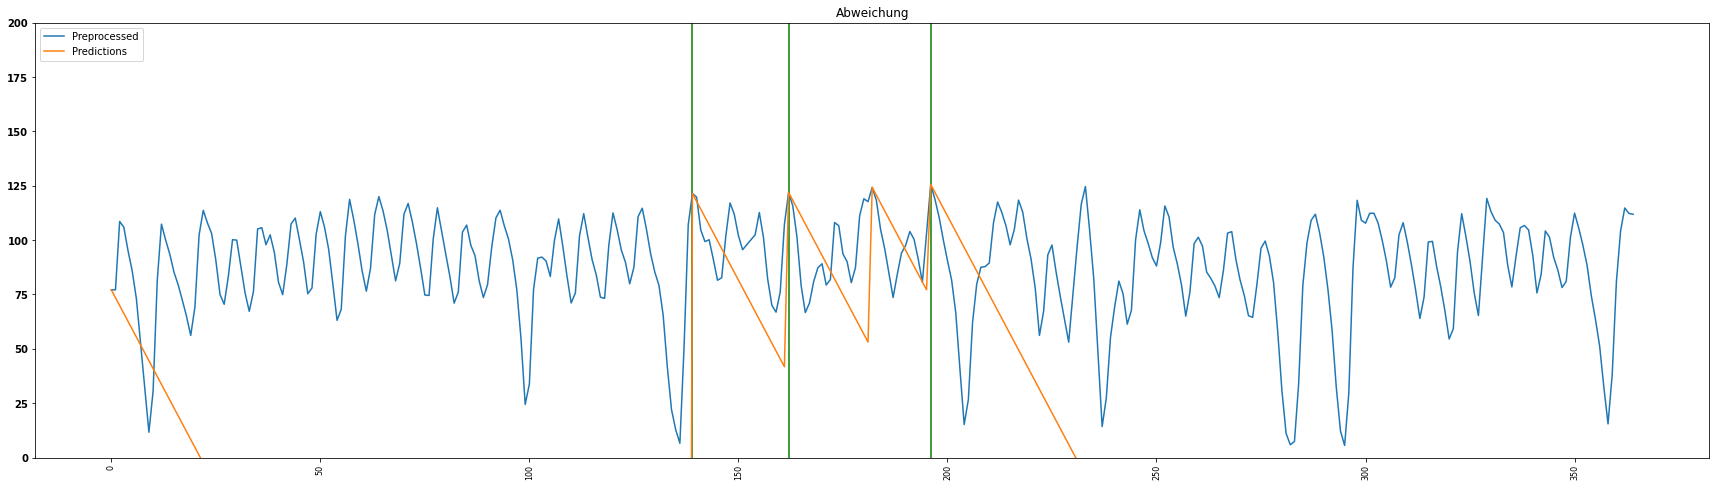

In [21]:
regression.linearRegressionPlot_pred(dfs_c0[0], 0)

In [28]:
def linearRegressionPlot_pred(input, cluster):
    if cluster < 0 or cluster > 4:
        print('Cluster has to be 0, 1, 2')
        return
    plt.figure(figsize=(30,8))
    plt.ylim((0,200))
    plt.title('Abweichung')

    plt.xticks(fontsize=8, rotation=90)
    plt.yticks(fontsize=10, fontweight='bold')
    plt.plot(input['inter_pol'])
    
    if cluster == 0:
        predicted = regression.predictValues_clust0(input)
        empties = preprocessing.calculate_empties_0(input, 1.01)
    elif cluster == 1:
        predicted = predictValues_clust1(input)
        empties = preprocessing.calculate_empties_1(input, 1.17)
    else:
        predicted = predictValues_clust2(input)
        empties = preprocessing.calculate_empties_2(input, 1.16)

    plt.plot(predicted)
    plt.legend(['Preprocessed', 'Predictions'], loc='upper left')

    for i in empties: 
        plt.vlines(i, color="green", ymin=0, ymax=200)
    plt.show()

NameError: name 'predictValues_clust1' is not defined

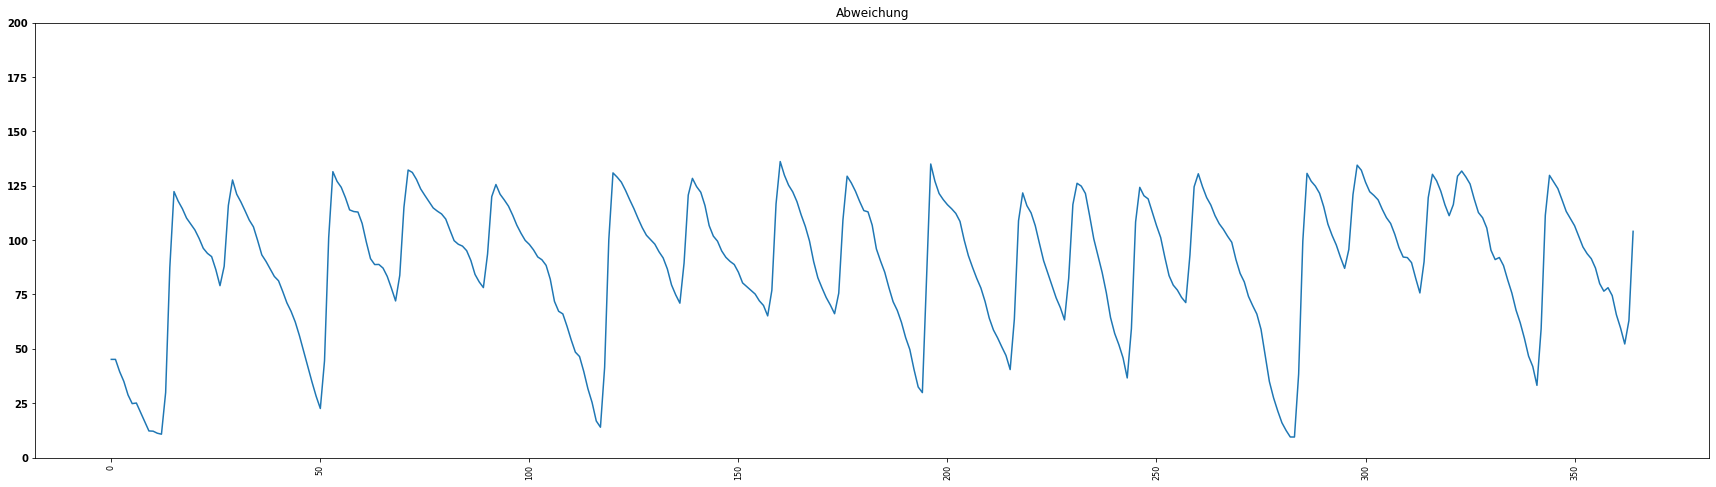

In [45]:
linearRegressionPlot_pred(test, 1)

In [19]:
regression.predictValues_clust2(dfs_c2[0])

values have been predicated
Root Mean Squared Error51.908746769258485


[117.10671936758894,
 113.48410308758893,
 138.1818181818182,
 134.5592019018182,
 130.93658562181818,
 127.3139693418182,
 123.69135306181819,
 120.06873678181819,
 116.44612050181819,
 112.82350422181818,
 109.2008879418182,
 105.57827166181818,
 101.95565538181819,
 98.33303910181819,
 94.71042282181818,
 91.0878065418182,
 87.46519026181818,
 83.84257398181819,
 80.21995770181819,
 76.59734142181819,
 72.97472514181818,
 83.13636363636363,
 79.51374735636362,
 75.89113107636362,
 72.26851479636363,
 68.64589851636363,
 65.02328223636363,
 61.400665956363625,
 57.77804967636362,
 54.15543339636363,
 50.532817116363624,
 46.91020083636363,
 43.287584556363626,
 39.66496827636362,
 36.04235199636363,
 32.419735716363625,
 28.79711943636363,
 25.174503156363627,
 21.551886876363625,
 17.929270596363622,
 14.306654316363634,
 84.08695652173911,
 80.46434024173911,
 76.8417239617391,
 73.2191076817391,
 69.59649140173912,
 65.97387512173911,
 62.35125884173911,
 58.72864256173911,
 55.10

In [30]:
test = pd.read_csv('/Users/davidblumenthal/Documents/bda_chall/bda-analytics-challenge-template/data/preprocessed/clusters/1/g_70B3D50070001742.csv')

In [43]:
pred = regression.predictValues_clust1(test)

values have been predicated
Root Squared Mean Error:  42.11750659676993


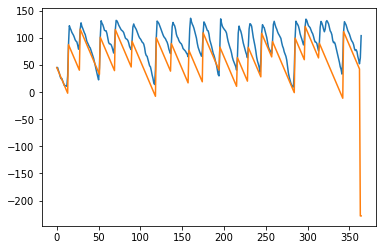

In [44]:
plt.plot(test['inter_pol'])
plt.plot(pred)

In [40]:
pred = regression.predictValues_general(test)
plt.plot(test['inter_pol'])
plt.plot(pred)

TypeError: predictValues_general() missing 2 required positional arguments: 'temp_list' and 'temp'